# Installatie

In [1]:
# Lorem ipsum dolor sit amet: hier moet een environmnet file beschikbaar zijn, die preinstalled is op de colab notebooks

**Instructie**

Je kan deze notebook gebruiken door met je cursus in een cel te gaan staan, en dan SHIFT-ENTER te typen. De code in die cel wordt dan uitgevoerd. Wat je ziet is python code, een populaire programmeertaal om met datastructure en AI te werken. De tussenresultaten van de code (de variabelen) worden zolang deze notebook open staat bewaard. Dit wil zeggen dat wanneer je achtereenvolgens volgende cellen gaat uitvoeren, er uiteindelijk 8 zal worden geprint

In [19]:
a = 5

In [20]:
b = 3

In [21]:
c = a + b
print(c)

8


# Bag of words
Bag-of-Words (BoW) is een eenvoudige techniek om tekst om te zetten in numerieke vorm, maar het heeft een aantal beperkingen, vooral bij het vastleggen van betekenis en context. Bij de one-hot encoding representeren we elk woord als een unieke vector met alleen nullen en een enkele 1 op de positie die overeenkomt met dat woord in de woordenschat.

Bijvoorbeeld, stel we hebben de volgende woordenlijst (vocabulaire):

In [2]:
["koning", "koningin", "man", "vrouw", "troon"]  

['koning', 'koningin', 'man', 'vrouw', 'troon']

Dan zou de one-hot encoding er als volgt uitzien:

In [3]:
koning    = [1, 0, 0, 0, 0]  
koningin  = [0, 1, 0, 0, 0]  
man       = [0, 0, 1, 0, 0]  
vrouw     = [0, 0, 0, 1, 0]  
troon     = [0, 0, 0, 0, 1]  


Het probleem met deze manier van werken is dat er geen context of betekenis aan woorden kunnen worden meegegeven. Koning en koningin staan qua betekenis dicht bij elkaar, maar dat is uit deze representatie niet duidelijk. Bovendien heb je even lange vectoren nodig als het aantal woorden in je woordenlijst: dat is niet schaalbaar voor echte talen.

# Embeddings
Word2Vec lost deze problemen op door woordvectoren te leren die in een lagere dimensie liggen (bijv. 300 getallen i.p.v. 100.000) én die betekenisvolle relaties tussen woorden behouden. Elk woord wordt dan 'ingebed' in een 300-dimensionele vectorruimte, vandaar de naam 'embedding'.

https://medium.com/@manansuri/a-dummys-guide-to-word2vec-456444f3c673

In [7]:
# de code hieronder laadt bestaande software in uit zogenaamde software bibliotheken (libraries)
from gensim.models.word2vec import Word2Vec # dit bevat een veelgebruikte embedder
import gensim.downloader as api # dit gaan we gebruiken om een groot stuk voorbeeldtekst te downloaden

In [8]:
corpus = api.load('text8')  # download het corpus en slaat dit op in een variable corpus als een lijst

Dit bevat data, grotendeels afkomstig van Wikipedia. De eerste paar items van dit corpus zien er als volgt uit:

In [ ]:
list(corpus)

['reciprocity',
 'qualitative',
 'impairments',
 'in',
 'communication',
 'as',
 'manifested',
 'by',
 'at',
 'least',
 'one',
 'of',
 'the',
 'following',
 'delay',
 'in',
 'or',
 'total',
 'lack',
 'of',
 'the',
 'development',
 'of',
 'spoken',
 'language',
 'not',
 'accompanied',
 'by',
 'an',
 'attempt',
 'to',
 'compensate',
 'through',
 'alternative',
 'modes',
 'of',
 'communication',
 'such',
 'as',
 'gesture',
 'or',
 'mime',
 'in',
 'individuals',
 'with',
 'adequate',
 'speech',
 'marked',
 'impairment',
 'in',
 'the',
 'ability',
 'to',
 'initiate',
 'or',
 'sustain',
 'a',
 'conversation',
 'with',
 'others',
 'stereotyped',
 'and',
 'repetitive',
 'use',
 'of',
 'language',
 'or',
 'idiosyncratic',
 'language',
 'lack',
 'of',
 'varied',
 'spontaneous',
 'make',
 'believe',
 'play',
 'or',
 'social',
 'imitative',
 'play',
 'appropriate',
 'to',
 'developmental',
 'level',
 'restricted',
 'repetitive',
 'and',
 'stereotyped',
 'patterns',
 'of',
 'behavior',
 'interests'

Het corpus bestaat uit een lijst, die zelf telkens bestaat uit meerdere lijsten (lijst in lijst). Met de len-functie en een FOR-loop kun je opvragen hoeveel items er in deze lijsten zitten, door over elk van de lijstjes in de grote lijst te lopen:

In [ ]:
grote_lijst = list(corpus)
total_words = 0
for kleine_lijst in grote_lijst:
    print("Het eerste woord van deze lijst is ", kleine_lijst[0], ", het aantal woorden in deze lijst is ", len(kleine_lijst))
    total_words = total_words + len(kleine_lijst)
print("Het totaal aantal woorden in dit corpus is ", total_words)

Het eerste woord van deze lijst is  anarchism , het aantal woorden in deze lijst is  10000
Het eerste woord van deze lijst is  reciprocity , het aantal woorden in deze lijst is  10000
Het eerste woord van deze lijst is  with , het aantal woorden in deze lijst is  10000
Het eerste woord van deze lijst is  despite , het aantal woorden in deze lijst is  10000
Het eerste woord van deze lijst is  present , het aantal woorden in deze lijst is  10000
Het eerste woord van deze lijst is  murray , het aantal woorden in deze lijst is  10000
Het eerste woord van deze lijst is  believes , het aantal woorden in deze lijst is  10000
Het eerste woord van deze lijst is  that , het aantal woorden in deze lijst is  10000
Het eerste woord van deze lijst is  century , het aantal woorden in deze lijst is  10000
Het eerste woord van deze lijst is  mountainous , het aantal woorden in deze lijst is  10000
Het eerste woord van deze lijst is  study , het aantal woorden in deze lijst is  10000
Het eerste woord va

## Word2Vec

We willen idealiter een vector die bepaalde aspecten van een woord kan capteren. Bekijk volgend fictief voorbeeld:

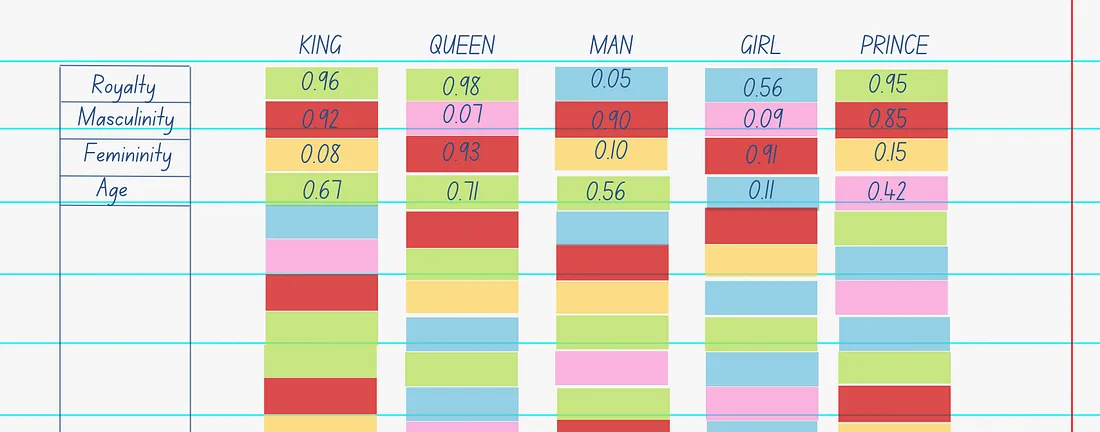

Links staan kenmerken zoals 'koninklijkheid', 'mannelijkheid', 'vrouwelijkheid' en 'leeftijd'. Op die manier zouden we voor de 5 voorbeeldwoorden in de kolommen getallen kunnen kleven die 'coderen' in welke mate dat woord die kenmerken heeft. Wij kunnen dat omdat wij de taal spreken, een computer moet dit doen via een omweg. Een computer kijkt naar welke woorden in een bepaalde zin 'inpassen'.

In de zin "de ____ zit op de troon" passen typisch een aantal woorden:
- koning
- koningin
- prins

Deze zin geeft dus een context waar sommige woorden in passen, en andere niet. Word2Vec buit dit idee uit, door voor een gegeven tekst, de context rond elk woord te bekijken (de woorden vlak ervoor en vlak erna) en te kijken welke woorden in dezelfde contexten kunnen voorkomen.

Je zou nu alle combinaties van woorden als verschillende contexten kunnen maken en daar een tabel van laten opstellen. Maar zelfs met een computer, is dat veel te veel werk, omdat het aantal mogelijke combinaties enorm snel stijgt. Er wordt iets slimmer gedaan, maar we zullen het model eerst gebruiken.

In [23]:
# Word2Vec is een model dat in 2013 werd ontwikkeld door onderzoekers van Google
model = Word2Vec(sentences=corpus, vector_size=50, window=5, min_count=1, workers=4)

In [24]:
# Toon embedding van een woord
print(model.wv["computer"])  # Vector van het woord "computer"

[-0.2418987   0.6143718  -1.6342388   3.1130967   1.6990445  -1.3703585
 -2.4637556  -0.8932907  -1.5896542  -0.04825618 -0.6449709  -1.1921332
  1.6333385   1.8868101   0.34999537 -1.1951275   4.375879   -2.5612645
  2.6399834  -3.925083   -1.8908345   1.3968487   1.6480838   1.1524957
 -1.6038619   2.2109463   0.88244075  4.0593653  -3.4930348   0.2205424
  2.11011    -3.133901   -2.8808312  -0.51894975 -3.9692516   3.70738
 -2.3203776  -0.49412942  1.8221132   0.55819905 -0.09656465  2.027278
 -0.6566077  -5.4358172  -4.2937565  -1.3408524  -0.95759463 -1.06291
  1.3895891  -1.5419898 ]


In [25]:
king_vector = model.wv["king"]
man_vector = model.wv["man"]
woman_vector = model.wv["woman"]
queen_vector = model.wv['queen']

new_vector = king_vector - man_vector + woman_vector
print(new_vector)

[-0.36968368 -0.65463674  0.3785472   1.3425322   0.5025053   0.32288218
  4.670708    3.8340137   1.9395741   4.7246895   0.19332182 -1.7074437
  1.1136916  -0.79191685  0.26568913  1.7198029  -0.77504915 -6.225437
 -0.23709136 -0.5471143   0.8318595  -6.194657    0.29080772  4.3393936
  1.7086155   2.1658049   0.37033045 -1.5231903   1.0930829  -2.786798
 -3.6146843   3.933445   -1.5643549  -2.9967856   1.2035837  -2.3599958
  0.99211776  0.56990623 -0.16616726 -2.356431    1.7398205  -5.11861
  2.3220892  -1.7040213   1.8446103   3.152228    2.6870675  -0.7496991
 -1.558377    0.8773029 ]


### Hoe is dit model gemaakt ?
Je kan dit model voorstel als een opeenvolging van input naar output.

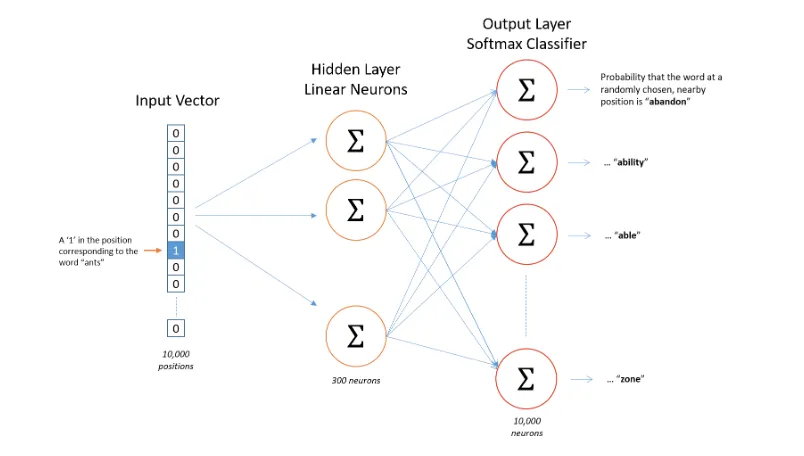

Als input is elk woord gecodeerd volgens zijn positie in de tekst. De oranje cellen hierboven spelen elk de rol van een dimensie van de uiteindelijke vectorruimte waarnaar we de data willen omzetten. In dit geval 300. De output cellen in rood, geven aan of dit woord overeenkomt met een aantal op voorhand gedefinieerde woorden. Dit is een voorbeeld van een neuraal netwerk.

Link naar een voorbeeld: https://playground.tensorflow.org 

Tussen elke laag in een neuraal netwerk zijn er pijltjes die aangeven waar elke output opnieuw als input wordt gebruikt. Elk van deze pijltjes heeft een bepaald gewicht, dat het neuraal network zelf moet leren. Vergelijk het met een pad in je brein waarin bepaalde neuronen sterker worden geactiveerd bij bepaalde input. Tussen de oranje en de rode laag wordt een softmax classifier gebruikt; die numerieke waarden omzet in kansen. Zo wordt een input vector omgezet in een reeks output waardes, waarbij de output waardes aangeven hoe groot de kans is dat een willekeurig gekozen woord in de buurt komt van een ander woord.

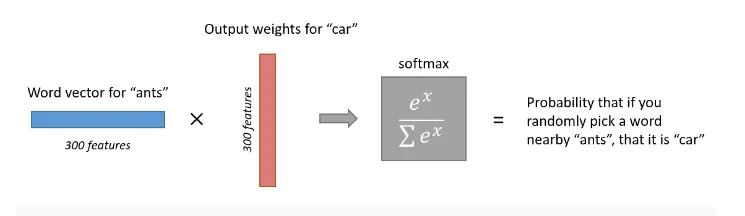

Nu kan je, als je een hele tekst hebt, de woorden en hun context stukje per stukje aan dit model geven, en de gewichtjes laten verbeteren zodanig dat uiteindelijk dit model zo goed mogelijk deze waardes benaderd.
- We hebben namelijk veel voorbeelden van woorden en de omliggende woorden die voorspeld zouden moeten worden
- we kunnen dus dit model *trainen*: we geven achtereenvolgens een woord en de verwachte uitkomst, en laten het model de gewichtjes aanpassen om zo dicht mogelijk bij het eindresultaat te komen.
- op die manier gaat de computer zélf leren welke informatie er in die vectorrepresentatie wordt bijgehouden, dit zal voor een mens niet meer zo makkelijk interpreteerbaar zijn als "koninklijkheid" of "leeftijd" zoals voordien.

### Wat kun je met het getraind model doen ?
Het getraind model heeft een vorm van betekenis geleerd: woorden die 'gelijkaardig' zijn in betekenis, liggen 'dicht bij elkaar. Dat dicht bij elkaar kunnen we uitrekenen:

In [26]:
similarity_score = model.wv.similarity('computer', 'graphics')
print(similarity_score)

0.73192203


Bovendien komt 'dicht bij mekaar' echt overeen met wat je in 2D of 3D al kent voor meetkundige hoeken:

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
new_vec_col = new_vector.reshape(1,-1) # wisselen van rijvector naar kolomvector
queen_vec_col = queen_vector.reshape(1,-1)

In [29]:
similarity_score = cosine_similarity(new_vec_col, queen_vec_col)
similarity_score

array([[0.728747]], dtype=float32)

In [30]:
import numpy as np

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2) # dit vermenigvuldigt elementsgewijs en telt alles daarna op. Geeft een scalair als resultaat
    
    # de vectoren moeten worden genormeerd
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    
    # Similarity
    similarity = dot_product / (norm_vec1 * norm_vec2)
    
    return similarity


# je eigen functie gebruiken:
similarity_score = cosine_similarity(new_vector, queen_vector)

print(f"Cosine Similarity: {similarity_score:.6f}")


Cosine Similarity: 0.728747


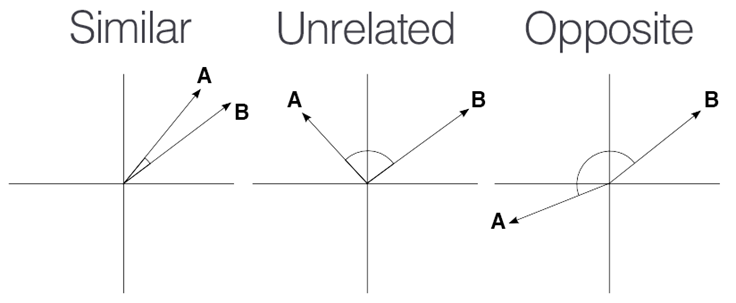

In [31]:
model_small = Word2Vec(sentences=corpus, vector_size=10, window=4, min_count=1, workers=4)

In [32]:
sentence = ["the", "queen", "does", "not", "like", "art", 'but', 'the', 'king', 'does']

In [33]:
embedding_dim = model_small.vector_size
print(embedding_dim)

10


# Attention is all you need
Deep learning models hadden op zich nog niet genoeg kracht om vlot tekst te kunnen verwerken. Het zou duren tot een nieuwe innovatie in 2016 hier verandering in bracht, door in de architectuur van een neuraal netwerk een vorm van geheugen in te bouwen. Dit noemen we 'attention'.

https://jalammar.github.io/illustrated-transformer/

## Positional awareness

In [35]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Voorbeeld zin, voorgseteld als word-enbeddings (3 woorden met 4D vectors)
input_sequence = torch.tensor([[0.1, 0.2, 0.3, 0.4],   # Woord 1
                               [0.5, 0.6, 0.7, 0.8],   # Woord 2
                               [0.9, 1.0, 1.1, 1.2]])  # Woord 3
input_sequence = input_sequence.unsqueeze(0)  # Add batch dimension (1, 3, 4)
print(input_sequence)

tensor([[[0.1000, 0.2000, 0.3000, 0.4000],
         [0.5000, 0.6000, 0.7000, 0.8000],
         [0.9000, 1.0000, 1.1000, 1.2000]]])


In [37]:
word_vectors = torch.tensor([model_small.wv[word] for word in sentence])  # Shape: (sequence_length, embedding_dim)
print(word_vectors)

tensor([[ 5.4794e+00,  1.0168e-01,  8.7875e-01,  4.0124e-01, -3.5552e-01,
          2.3340e+00, -1.2767e+00,  2.2915e+00,  1.0257e+00,  1.0237e+00],
        [ 1.1131e+00, -1.3453e+00,  5.6717e+00, -3.5602e+00, -2.3594e+00,
          2.2301e+00,  1.0856e+00,  1.1983e+00, -6.1541e-01,  4.6634e+00],
        [ 7.2236e+00, -7.1239e-01, -1.6441e+00,  9.6426e-01, -8.2543e+00,
         -6.5613e-01, -2.4029e+00,  4.9563e+00, -8.0798e-01,  2.1292e-01],
        [ 7.0832e+00,  1.2593e+00,  1.2561e+00,  1.5810e-01, -6.1632e+00,
         -2.0280e+00,  9.1519e-01,  2.9385e+00,  3.2803e+00, -2.8250e+00],
        [ 7.1835e-01, -9.0222e-02, -3.4355e+00, -1.6287e+00, -2.3419e+00,
          2.6072e+00, -5.0094e-01,  2.1598e+00, -1.3359e+00, -2.3308e+00],
        [-4.2457e-01, -3.0004e+00, -2.1286e+00, -2.1056e+00,  1.9639e+00,
          2.2103e+00,  1.8070e+00,  3.8258e+00,  3.7125e+00,  7.4835e-01],
        [ 4.6111e+00,  2.2704e+00,  1.9237e+00,  9.8657e-01, -2.2705e+00,
          2.1222e-01,  1.7562e-0

/tmp/ipykernel_3931/4239300404.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  word_vectors = torch.tensor([model_small.wv[word] for word in sentence])  # Shape: (sequence_length, embedding_dim)


In [39]:
# Add batch dimension: (1, sequence_length, embedding_dim)
input_sequence = word_vectors.unsqueeze(0)
print(input_sequence)

tensor([[[ 5.4794e+00,  1.0168e-01,  8.7875e-01,  4.0124e-01, -3.5552e-01,
           2.3340e+00, -1.2767e+00,  2.2915e+00,  1.0257e+00,  1.0237e+00],
         [ 1.1131e+00, -1.3453e+00,  5.6717e+00, -3.5602e+00, -2.3594e+00,
           2.2301e+00,  1.0856e+00,  1.1983e+00, -6.1541e-01,  4.6634e+00],
         [ 7.2236e+00, -7.1239e-01, -1.6441e+00,  9.6426e-01, -8.2543e+00,
          -6.5613e-01, -2.4029e+00,  4.9563e+00, -8.0798e-01,  2.1292e-01],
         [ 7.0832e+00,  1.2593e+00,  1.2561e+00,  1.5810e-01, -6.1632e+00,
          -2.0280e+00,  9.1519e-01,  2.9385e+00,  3.2803e+00, -2.8250e+00],
         [ 7.1835e-01, -9.0222e-02, -3.4355e+00, -1.6287e+00, -2.3419e+00,
           2.6072e+00, -5.0094e-01,  2.1598e+00, -1.3359e+00, -2.3308e+00],
         [-4.2457e-01, -3.0004e+00, -2.1286e+00, -2.1056e+00,  1.9639e+00,
           2.2103e+00,  1.8070e+00,  3.8258e+00,  3.7125e+00,  7.4835e-01],
         [ 4.6111e+00,  2.2704e+00,  1.9237e+00,  9.8657e-01, -2.2705e+00,
           2.1222e-

Hieronder een simpel neuraal netwerk, zonder woordvolgorde:

In [40]:
# Simple Feedforward Neural Network (ignores position)
class SimpleNN(nn.Module):
    def __init__(self, embedding_dim):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(embedding_dim, embedding_dim)  # Transformeer input embeddings

    def forward(self, x):
        return self.fc(x)
    
simple_nn = SimpleNN(embedding_dim=embedding_dim)
output_simple = simple_nn(input_sequence)
print("Simple Neural Network Output (heeft geen notie van positie):\n", output_simple.detach().numpy())

Simple Neural Network Output (heeft geen notie van positie):
 [[[-2.0132754   0.96088    -2.392934   -1.4880285  -0.06683525
    1.0187287   0.5528245   0.2912031  -1.0572261  -2.5326934 ]
  [-1.8286297   0.75167936  0.7541842   0.36841965 -0.6602429
    2.496723   -1.6072211  -0.49904722  0.10380602 -1.8161123 ]
  [ 0.46761063 -1.0607755  -3.0993228  -0.55166686  2.286374
    2.9976707  -0.3163469  -0.5518885  -3.1379702  -1.268506  ]
  [ 0.67825305 -0.8283591  -0.48464438 -2.8270383  -0.4814492
    3.9163458   0.7540855  -0.42327324 -0.5525892  -1.2436733 ]
  [ 1.5077205   0.27939346 -1.3124183   0.06077869 -0.10433762
   -0.22652566 -0.6399164   1.880014   -0.2248955   0.9468499 ]
  [-0.00868056  1.763421    0.5150023   0.09541228 -1.7688442
   -1.4285309   0.60019284  2.7389922   0.3181781  -2.1156511 ]
  [-0.4207007  -1.0287222  -1.1288067  -2.2361176  -0.76977503
    1.9420484   0.87054163  0.2897081  -0.51163524 -1.1655906 ]
  [-2.0132754   0.96088    -2.392934   -1.4880285  -0.

In [42]:
# Transformer met positional zncoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=10):
        super(PositionalEncoding, self).__init__()

        # Matrix met shape (vorm) (max_len, d_model)
        position = torch.arange(max_len).unsqueeze(1)  # Shape (max_len, 1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))

        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)  # Even indices
        pe[:, 1::2] = torch.cos(position * div_term)  # Oneven indices

        self.pe = pe.unsqueeze(0)  # Shape (1, max_len, d_model)

    def forward(self, x):
        return x + self.pe[:, :x.size(1), :]

# Transformer-achtig Model met positional encoding
class TransformerModel(nn.Module):
    def __init__(self, d_model):
        super(TransformerModel, self).__init__()
        self.positional_encoding = PositionalEncoding(d_model)
        self.fc = nn.Linear(d_model, d_model)  # Transformeer embeddings

    def forward(self, x):
        x = self.positional_encoding(x)
        return self.fc(x)

# Instantiate model
transformer = TransformerModel(d_model=embedding_dim)

# Pass input through model
output_transformer = transformer(input_sequence)

# Print Results
print("Simple Neural Network Output (heeft geen notie van positie):\n", output_simple.detach().numpy())
print("\nTransformer met positional encoding output:\n", output_transformer.detach().numpy())


Simple Neural Network Output (heeft geen notie van positie):
 [[[-2.0132754   0.96088    -2.392934   -1.4880285  -0.06683525
    1.0187287   0.5528245   0.2912031  -1.0572261  -2.5326934 ]
  [-1.8286297   0.75167936  0.7541842   0.36841965 -0.6602429
    2.496723   -1.6072211  -0.49904722  0.10380602 -1.8161123 ]
  [ 0.46761063 -1.0607755  -3.0993228  -0.55166686  2.286374
    2.9976707  -0.3163469  -0.5518885  -3.1379702  -1.268506  ]
  [ 0.67825305 -0.8283591  -0.48464438 -2.8270383  -0.4814492
    3.9163458   0.7540855  -0.42327324 -0.5525892  -1.2436733 ]
  [ 1.5077205   0.27939346 -1.3124183   0.06077869 -0.10433762
   -0.22652566 -0.6399164   1.880014   -0.2248955   0.9468499 ]
  [-0.00868056  1.763421    0.5150023   0.09541228 -1.7688442
   -1.4285309   0.60019284  2.7389922   0.3181781  -2.1156511 ]
  [-0.4207007  -1.0287222  -1.1288067  -2.2361176  -0.76977503
    1.9420484   0.87054163  0.2897081  -0.51163524 -1.1655906 ]
  [-2.0132754   0.96088    -2.392934   -1.4880285  -0.

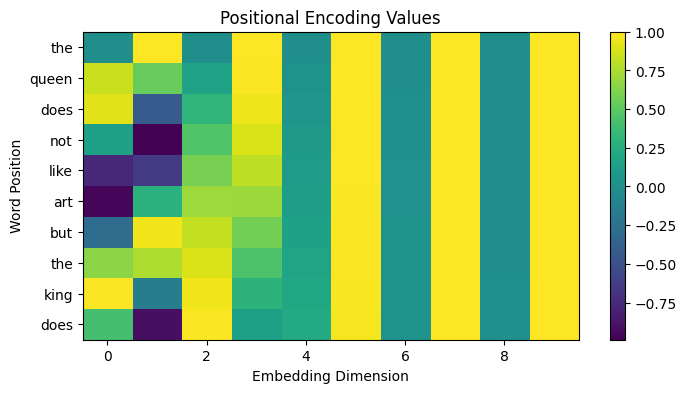

In [64]:
# Plot Positional Encodings to Show the Effect
plt.figure(figsize=(8, 4))
plt.imshow(transformer.positional_encoding.pe.squeeze().numpy(), cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Positional Encoding Values")
plt.xlabel("Embedding Dimension")
plt.ylabel("Word Position")

plt.yticks(ticks=range(len(sentence)), labels=sentence)
plt.show()

### Vergelijken voor 'gelijkaardige' zinnen

In [66]:
sentences = [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["on", "the", "mat", "sat", "the", "cat"],
    ["the", "mat", "was", "sat", "on", "by", "the", "cat"],
    ["sat", "on", "the", "mat", "the", "cat", "did"]
]

In [70]:
embedding_dim = model_small.vector_size
word_vectors = [torch.tensor([model_small.wv[word] for word in sentence if word in model_small.wv]) for sentence in sentences]
word_vectors = [wv.unsqueeze(0) for wv in word_vectors]

In [71]:
class TransformerWithAttention(nn.Module):
    def __init__(self, d_model):
        super(TransformerWithAttention, self).__init__()
        self.positional_encoding = PositionalEncoding(d_model)
        self.attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=2, batch_first=True)
        self.fc = nn.Linear(d_model, d_model)

    def forward(self, x):
        x = self.positional_encoding(x)
        attn_output, _ = self.attention(x, x, x)  # Self-attention
        return self.fc(attn_output)



🚀 Sentence Variation 1: the cat sat on the mat


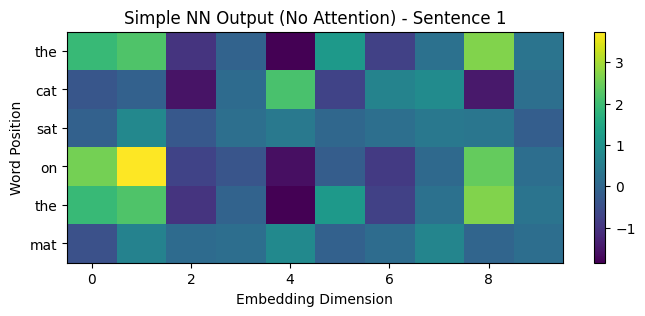

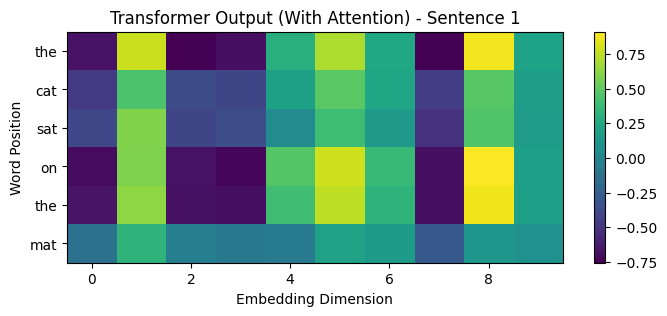


🚀 Sentence Variation 2: on the mat sat the cat


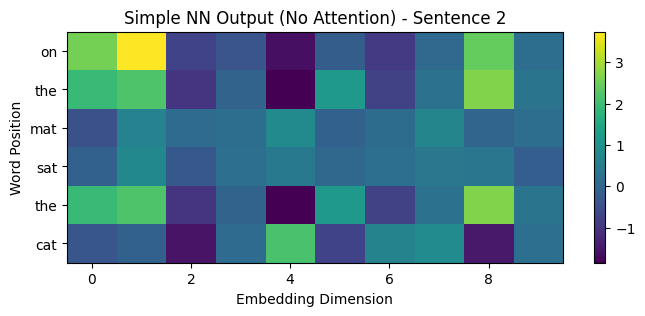

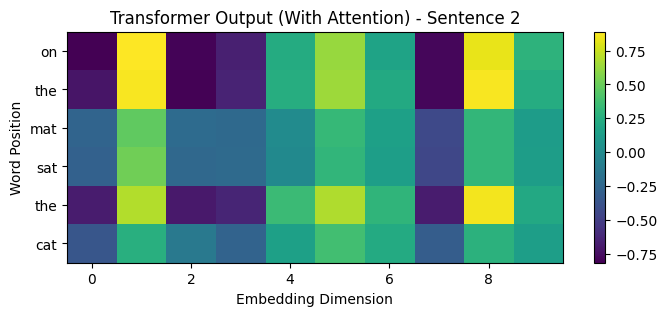


🚀 Sentence Variation 3: the mat was sat on by the cat


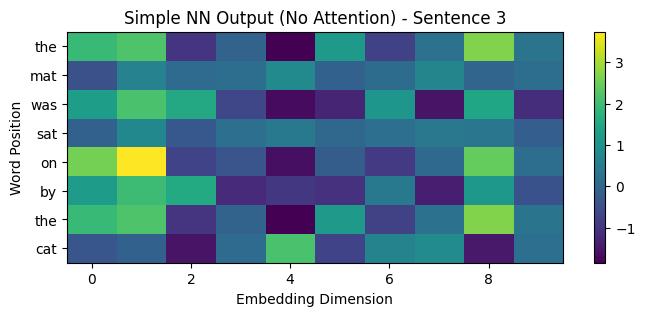

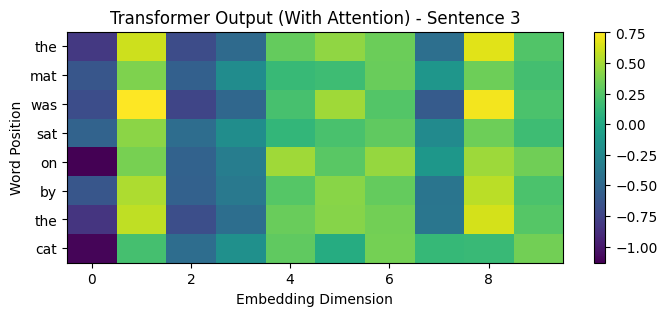


🚀 Sentence Variation 4: sat on the mat the cat did


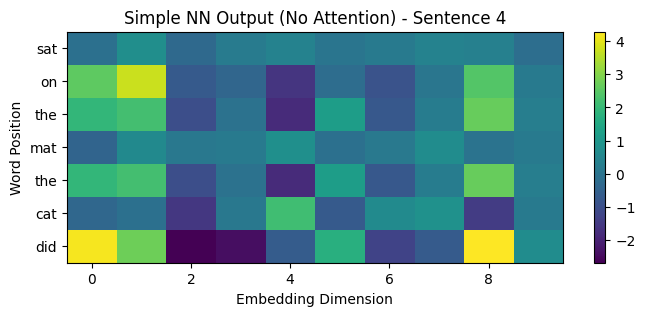

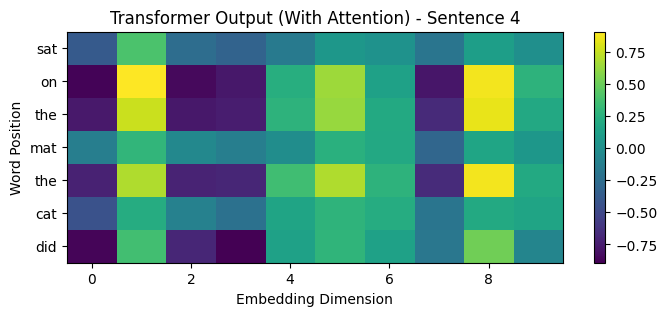

In [72]:
# Instantiate models
simple_nn = SimpleNN(embedding_dim)
transformer = TransformerWithAttention(d_model=embedding_dim)

# Pass sentences through both models
outputs_simple = [simple_nn(wv) for wv in word_vectors]  # No positional awareness
outputs_transformer = [transformer(wv) for wv in word_vectors]  # With self-attention

# Convert to numpy for visualization
outputs_simple_np = [out.squeeze().detach().numpy() for out in outputs_simple]
outputs_transformer_np = [out.squeeze().detach().numpy() for out in outputs_transformer]

# 🚀 Compare Differences in Outputs
def plot_sentence_embedding(sentence, embedding, title):
    plt.figure(figsize=(8, 3))
    plt.imshow(embedding, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel("Embedding Dimension")
    plt.ylabel("Word Position")
    plt.yticks(range(len(sentence)), labels=sentence)
    plt.show()

# Plot comparison for first sentence
for i, sentence in enumerate(sentences):
    print(f"\n🚀 Sentence Variation {i+1}: {' '.join(sentence)}")

    # Simple model output
    plot_sentence_embedding(sentence, outputs_simple_np[i], title=f"Simple NN Output (No Attention) - Sentence {i+1}")

    # Transformer output
    plot_sentence_embedding(sentence, outputs_transformer_np[i], title=f"Transformer Output (With Attention) - Sentence {i+1}")

Theoretisch resultaat van deep learning: elke functie representeren ? Kijken naar tropical geometry

# Transformers

Nu we heel snel hebben uitgelegd wat een transformer is, kunnen we kijken naar GPT modellen, zoals GPT-2. GPT staat voor Generative Pre-trained Transformer, waarvan we de laatste 2 woorden al hebben verklaard:
- Het is een model dat getrained is (op publieke tekst, beschikbaar op het inernet)
- Het is een transformer model, dwz het is een deep neural network met een bepaalde architectuur zodat het belang kan hechten aan woordvolgorde.

Het woord 'generative' betekent dat dit model tijdens het trainen geleerd heeft om in bepaalde stukken tekst een woord aan te vullen, zoals 'De kat krabt de krollen van de ___'. Hierdoor kan dit model, als je het een stuk tekst geeft, het meest waarschijnlijke volgende woord aangeven.

GPT2 is een model dat werd ontwikkeld in 2019, en getraind werd op 8 miljoen webpagina's. We gebruiken hier de kleine versie met 114 miljoen (114 000 000) parameters. Dit wil grosso modo zeggen dat er in het neuraal netwerk 114 000 000 gewichtjes op punt moesten worden gesteld om deze machine te laten werken.

In [ ]:
from transformers import pipeline

# We laden dit model in, dit wil zeggen: dit is een versie waar de gewichtjes voor alle duidelijkheid al vast staan (die berekening, het trainen, gebeurde eerder: pre-trained)
generator = pipeline("text-generation", model="gpt2")

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Voorspelde tekst:
 We are in a classroom. Artificial Intelligence is changing the way we  deal with problems. We


In [54]:
# Hierbij een zin
input_text = "We are in a classroom. Artificial Intelligence is changing the way we "

# Volgende woorden genereren
output = generator(input_text, max_length=20, num_return_sequences=1)

# Print the predicted continuation
print("Voorspelde tekst:\n", output[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Voorspelde tekst:
 We are in a classroom. Artificial Intelligence is changing the way we vernaculars."




Met een model kunnen we ook, naast de meest waarschijnlijke voorspelling, kijken naar net iets minder waarschijnlijke woorden. Dit kunnen je regelen met de zogenaamde 'temperatuur' instelling.

In [10]:
output = generator(input_text, max_length=20, num_return_sequences=3, temperature=0.8)
for i, result in enumerate(output):
    print(f"Prediction {i+1}: {result['generated_text']}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prediction 1: Artificial Intelligence is changing the way we  analyze the world. The world is changing because
Prediction 2: Artificial Intelligence is changing the way we �� we live through technology, and I think you will
Prediction 3: Artificial Intelligence is changing the way we ute that the world works, which is why it's


Omdat de data waarop dit model is getrained, ongefilterde is vanop het internet, geeft de maker van deze dataset volgende waarschuwing:


*"Because large-scale language models like GPT-2 do not distinguish fact from fiction, **we don’t support use-cases that require the generated text to be true**.*
*Additionally, language models like GPT-2 reflect the biases inherent to the systems they were trained on, so we do not recommend that they be deployed into systems that interact with humans > unless the deployers first carry out a study of biases relevant to the intended use-case. We found no statistically significant difference in gender, race, and religious bias probes between 774M and 1.5B, implying all versions of GPT-2 should be approached with similar levels of caution around use cases that are sensitive to biases around human attributes.*

# LLM's

Larga language models zijn dus grote modellen die je kan gebruiken om tekst te voorspellen. Je kan zelf zulke getrainde modellen downloaden en op je eigen computer draaien. Je zal merken dat deze modellen veel trager reageren dan je gewend bent van bijvoorbeeld chatGPT. Dit is omdat jouw computer moeite heeft met de mijarden berekeningen die het voor elk woord te voorspellen, moet doen.

### Tekst genereren

Wanneer je 1 token kan voorspellen, is het een koud kunstje voor een computer om een heel antwoord te maken: je geeft bij een prompt door een gebruiker volgende tekst mee:

"
USER: "Hallo, chatGPT, kun je me iets vertellen over Napoleon?"
SYSTEM: "Ja, Napoleon is een Franse "
"

Bij elk volgend woord wordt deze input die je meegeeft aan de LLM iets langer, en op die manier produceert de machine tekst. Door de tekst van de gebruiker en die van de machine zelf duidelijk te coderen, krijg je iets wat op een conversatie lijkt.

### Langs een API, naar een model op internet

In [2]:
import requests
from dotenv import load_dotenv
import os
from mistralai import Mistral

# environment vars inladen
load_dotenv('secrets.env')

def ask_mistral_api(question):
    api_token = os.getenv("MISTRAL_TOKEN")
    model = "mistral-large-latest"

    client = Mistral(api_key=api_token)

    chat_response = client.chat.complete(
        model = model,
        messages = [
            {
                "role": "user",
                "content": question,
            },
        ]
    )
    return chat_response

# Example usage
question = "Wat is de hoofdstad van Frankrijk?"
answer = ask_mistral_api(question)
print(answer.choices[0].message.content)

De hoofdstad van Frankrijk is Parijs (Frans: Paris). Parijs is een van de meest bekende en bezochte steden ter wereld, met iconische bezienswaardigheden zoals de Eiffeltoren, de Louvre, en de Notre-Dame-kathedraal.


### Lokaal, via Ollama
Als je deze demo zelf wil doen, zou je ollama moeten installeren op je systeem. Dit kan je thuis eens proberen ([www.ollama.ai](https://ollama.com/))
het verschil met de vorige code is dat dit model niet meer langs het internet gaat, maar enkel modellen lokaal op jouw computer gebruikt.

In [1]:
import ollama

De code hieronder zal beduidend langer duren dan de vorige, want je maakt nu geen gebruik meer van heel krachtige servers.

In [2]:
response = ollama.chat(model='mistral', messages=[
  {
    'role': 'user',
    'content': 'Hoe werkt een regenboog?',
  },
])
print(response['message']['content'])

 Een regenboog ontstaat wanneer zonlicht door droplelletjes in de lucht wordt gebroken. Dit gebeurt volgens het brekingstoetswetje, dat stelt dat het licht zich verandert tijdens de breking door verschillende dichtheden en types van lucht. Hierdoor ontstaan de verschillende kleuren in een regenboog:

1. Rood: Dit is de eerste kleur boven de regenboogbasis, maar we zien deze kleur niet zo vaak omdat het rood licht gemakkelijker door dichte lucht wordt geabsorbeerd en daardoor niet verder brekt.

2. Oranje en gele kleuren: Deze kleuren staan iets hoger in de regenboog en zijn gevormd door het breken van groene en blauwe lichtstralen.

3. Groen en blauw: Deze kleuren bevinden zich boven de oranje en gele kleuren en worden gevormd door verdere breking van groene en rood lichtstralen. De laagste blauwe regel is vaak de zichtbaarste van alle kleuren in een regenboog.

4. Indigo en violet: Deze kleuren bevinden zich boven de blauwe ring en zijn gevormd door verdere breking van rood en oranje 